# Algorytmy macierzowe - mnożenie macierzy
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 3**

*Temat:* Proszę napisać mnożenie macierzy rIGA i rIGA używając algorytmu mnożenia blokowego, i 
dobrać optymalną kolejność pętli oraz rozmiar bloków 

Treść ćwiczenia:

1. Proszę wybrać dwie możliwie największe macierze A i B ze swoich dwóch 
rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je 
A*B swoim optymalnym algorytmem (tak duże macierze jakie da się w 
czasie kilku-kilkudziesięciu minut przemnożyć na Państwa laptopie) 
2. Proszę narysować schemat niezerowych wartości swoich dwóch macierzy 
(używając komendy spy(A), spy(B) MATLABa) oraz macierzy wynikowej 
A*B 
3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy dla 
różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować 
tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia 
3. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch macierzy 
A i B zmierzyć czasy mnożenia w algorytmie mnożenia blokowego.  Proszę 
narysować wykres: oś x rozmiar bloków, oś y czas mnożenia 
4. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do 



In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Ad. 1
Jako macierze A i B wybraliśmy macierze wygenerowane przez podany na zajęciach skrypt `massmatrix.m`. W tym celu użyliśmy funkcji `massmatrix(2,nxx,2,2)`, gdzie nxx = {2,3,4}. Następnie wyniki zapisaliśmy w pliku o formacie csv. Poniższy kod wczytuje obie macierze jako `np.array` 

In [30]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [31]:
A, B = get_matrix_from_csv("rigas/riga100.csv"), get_matrix_from_csv("rigas/riga100.csv")

### Ad. 2
Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową. Do mnożenia macierzy wykorzystano wbudowany w bibliotekę numpy znak mnożenia macierzy

In [32]:
def spy(matrix, label):
    mask = matrix == 0
    plt.matshow(mask)
    plt.title(label)
    plt.show()

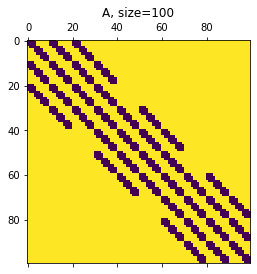

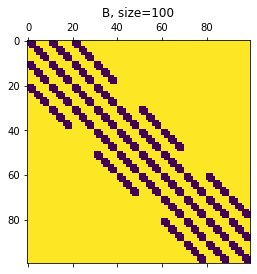

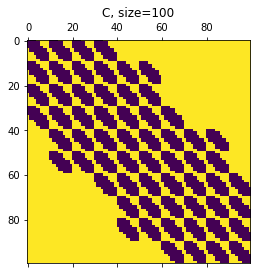

In [6]:
n = np.size(A, 0)
C = A@B
    
spy(A, f"A, size={n}")
spy(B, f"B, size={n}")
spy(C, f"C, size={n}")

### Ad. 3
Teraz zmierzymy czas dla wszystkich możliwych 6 permutacji obliczania iloczynu macierzy. Urzyjemy do tego funkcji `log_time`, która wypisze nam czas trwania funkcji w sekundach

In [23]:
from time import time

def log_time(func, message):
    number_of_tests = 5
    exec_times = []
    for _ in range(number_of_tests):
        t1 = time()
        func()
        t2 = time()
        exec_times.append(round(t2 - t1, 5))
    
    avg_time = round(sum(exec_times)/number_of_tests, 5)
    print(f"{message:8}: {avg_time} [s]")
    return avg_time

In [35]:
def multi_ijp(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for i in range(m):
        for j in range(n):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]
                
                
def multi_ipj(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for i in range(m):
        for p in range(k):
            for j in range(n):
                C[i][j] += A[i][p] * B[p][j]


def multi_jip(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for j in range(n):
        for i in range(m):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]


def multi_jpi(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for j in range(n):
        for p in range(k):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]


def multi_pij(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for i in range(m):
            for j in range(n):
                C[i][j] += A[i][p] * B[p][j]


def multi_pji(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for j in range(n):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]



def mat_mul(A, B, mul_func=multi_ijp):
    C = np.zeros((np.size(A, 0), np.size(B, 1)))
    mul_func(A, B, C)
    return C

In [36]:
mat_mul_functions = [multi_ijp ,multi_ipj, multi_jip, multi_jpi, multi_pij, multi_pji]

print("Function  time")
for fun in mat_mul_functions:
    log_time(lambda: mat_mul(A, B, fun), fun.__name__)

Function  time
multi_ijp: 0.77947 [s]
multi_ipj: 0.77854 [s]
multi_jip: 0.76864 [s]
multi_jpi: 0.72863 [s]
multi_pij: 0.76392 [s]
multi_pji: 0.76194 [s]


Tutaj jest miejsce na wnioski

### Ad. 4
Poniżej napisaliśmy program do blokowego mnożenia macierzy. Ponieważ w tym ćwiczeniu mamy do czynienia jedynie z macierzami kwadratowymi, przyjęliśmy, że podziały bloków przy różnych kolumnach macierzy są zawsze takie same. Zależność czasu od długości pojedynczego bloku przedstawiliśmy na wykresie poniżej.

In [26]:
def block_mul(A, B, m_bs, n_bs, k_bs):
    C = np.zeros((np.size(A, 0), np.size(B, 1)))
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)

    for i in range(0, m, m_bs):
        for j in range(0, n, n_bs):
            for p in range(0, k, k_bs):
                A_slice = A[i:i+m_bs, p:p+k_bs]
                B_slice = B[p:p+k_bs, j:j+n_bs]
                C_slice = C[i:i+m_bs, j:j+n_bs]
                multi_ijp(A_slice, B_slice, C_slice)
    return C

In [28]:
block_lengths = [2, 3, 5, 10, 15, 20, 25, 33, 40, 50, 75]
times = [
    log_time(lambda: block_mul(A, B, nb, nb, nb), f"Block length {nb}") 
    for nb in block_lengths
]

Block length 2: 1.31185 [s]
Block length 3: 0.94302 [s]
Block length 5: 0.78692 [s]
Block length 10: 0.73225 [s]
Block length 15: 0.75262 [s]
Block length 20: 0.70525 [s]
Block length 25: 0.72135 [s]
Block length 33: 0.74421 [s]
Block length 40: 0.73921 [s]
Block length 50: 0.69341 [s]
Block length 75: 0.69864 [s]


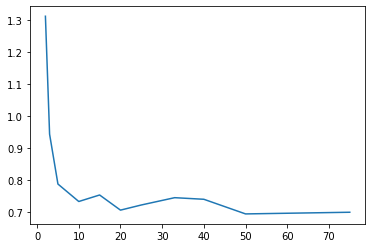

In [29]:
# plt.plot(block_lengths, times)
# plt.show()
# TODO zrobić ładny wykres

Miejce na wnioski

### Ad. 5
Miejsce na gflopsy

## Podsumowanie